In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
import graphlab
%matplotlib inline


In [11]:
df = pd.read_csv("processed_data.csv")

In [12]:
df["course_category"].unique()

array(['web development', 'programming', 'sql', 'other', 'art',
       'data science', 'information technology',
       'software development / mobile application', 'business', 'adobe',
       'excel', 'math', 'writing', 'accounting', 'language'], dtype=object)

In [13]:
df.rating.mean()

4.652997381461459

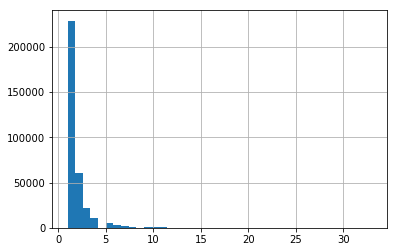

In [14]:
df["user_review_count"].hist(bins=40)

In [15]:
df.user_review_count.value_counts()

1     228702
2      60926
3      22053
4      10276
5       5660
6       3054
7       2079
8       1232
9        927
10       540
11       440
12       288
13       195
14       140
16       112
15       105
26        78
18        72
21        63
19        57
17        51
23        46
33        33
32        32
28        28
22        22
Name: user_review_count, dtype: int64

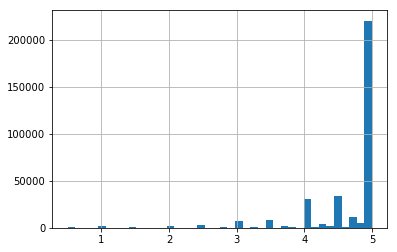

In [16]:
df["user_rating_avg"].hist(bins=40)

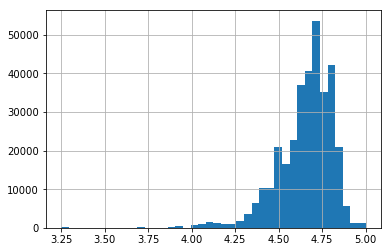

In [17]:
df["course_rating_avg"].hist(bins=40)

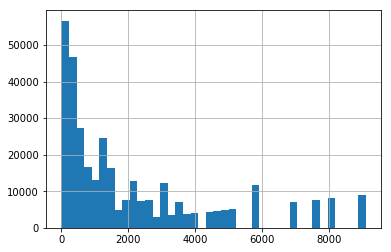

In [18]:
df["course_review_count"].hist(bins = 40)

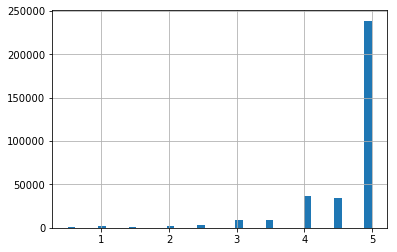

In [19]:
df["rating"].hist(bins=40)

In [20]:
n_users = df.userid.nunique()
n_items = df.course_id.nunique()

In [21]:
print "Total number of users: ", n_users
print "Total number of courses:", n_items

Total number of users:  271459
Total number of courses: 976


In [22]:
sparsity=round(1.0-len(df)/float(n_users*n_items),5)
print('The sparsity level is ' +  str(sparsity*100) + '%')

The sparsity level is 99.873%


In [23]:
courseids = sorted(df["course_id"].unique())
userids = sorted(df["userid"].unique())

In [24]:
cold_users = df[df["user_review_count"] <=2]
cold_users.shape

(289628, 36)

In [25]:
reg = df[df["user_review_count"] > 2]
reg.shape

(47583, 36)

In [60]:
reg["course_id"].nunique()

936

In [61]:
reg["userid"].nunique()

12294

In [26]:
cold_users["userid"].nunique()

259165

In [27]:
cold_users["course_id"].nunique()

975

In [30]:
diff = np.setdiff1d(cold_users["published_title"], reg["published_title"].unique())

In [32]:
diff

array(['22-practical-lessons-in-leadership', 'abhyasa-summary',
       'acumen-presents-angela-duckworth-on-building-grit',
       'angular-2-fundamentals-with-typescript-for-pro-developers-systemjs',
       'beginning-project-management-project-management-level-one',
       'big-data-hadoop-the-complete-course',
       'building-incredible-willpower',
       'clickbank-affiliate-marketing-success-facebook-ads-super-strategy',
       'dan-ariely-on-changing-customer-behavior',
       'enterprise-wpf-with-xaml-from-scratch',
       'excel-2016-intermediate-training-videos',
       'experience-design-patterns', 'find-high-quality-clients-on-upwork',
       'google-ads',
       'how-to-make-a-difference-by-nicholas-kristof-sheryl-wudunn',
       'how-to-write-a-business-plan', 'kali-linux-tutorials',
       'leanmanagement', 'learn-angular-2-from-beginner-to-advanced',
       'learn-software-testing-in-practical-become-a-qa-expert',
       'learnaccountingforfree', 'learnpremierepro', 'ma

In [33]:
diff1 = np.setdiff1d(reg["published_title"].unique(),cold_users["published_title"].unique())

In [34]:
diff1

array(['powerful-goal-setting-step-by-step-blueprint'], dtype=object)

In [37]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
validate_df = pd.DataFrame()
for i in reg["userid"].unique():
    dataIwant = reg[reg["userid"] == i]
    if len(dataIwant) == 3:
        test_index = np.random.choice(dataIwant.index, size = 1, replace=False)
        test = dataIwant.loc[test_index]
        dataIwant.drop(test_index, inplace=True)
        validate_index = np.random.choice(dataIwant.index, size = 1, replace=False)
        validate = dataIwant.loc[validate_index]
        dataIwant.drop(validate_index, inplace=True)
        test_df = pd.concat([test_df, test])
        validate_df = pd.concat([validate_df, validate])
        train_df = pd.concat([train_df, dataIwant])
    else:   
        test_indices = np.random.choice(dataIwant.index, size = len(dataIwant)/4, replace=False)
        test = dataIwant.loc[test_indices]
        dataIwant.drop(test_indices, inplace=True)
        validate_indices = np.random.choice(dataIwant.index, size = len(dataIwant)/4, replace=False)
        validate = dataIwant.loc[validate_indices]
        dataIwant.drop(validate_indices, inplace=True)
        test_df = pd.concat([test_df, test])
        validate_df = pd.concat([validate_df, validate])
        train_df = pd.concat([train_df, dataIwant])

/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning

In [38]:
test_df.shape

(12867, 36)

In [39]:
validate_df.shape

(9960, 36)

In [40]:
train_df.shape

(24756, 36)

In [41]:
train_df.to_csv("train.csv")

In [42]:
validate_df.to_csv("validation.csv")
test_df.to_csv("test.csv")

In [48]:
np.setdiff1d(test_df.course_id.unique(), train_df.course_id.unique())

array([   8814,   17708,   33145,   87156,  150656,  230590,  298212,
        340314,  521580,  527468,  537750,  575592,  614070,  620926,
        649056,  680048,  806474,  822290,  897192,  915782,  927356,
        942320,  950710,  965720,  981502, 1081714, 1109602, 1193034,
       1241254])

In [51]:
df.course_id.nunique()

976

In [52]:
common_users = {}
commonUsers = {}
for i, course1 in enumerate(df.course_id.unique()):
    for j, course2 in enumerate(df.course_id.unique()):
        if i < j:
            course1_users = df[df["course_id"] == course1]["userid"].unique()
            course2_users = df[df["course_id"] == course2]["userid"].unique()
            
            common = np.intersect1d(course1_users, course2_users, assume_unique=True)
            common_users[(course1,course2)] = len(common)
            commonUsers[(course1, course2)] = common
            
            
            
            

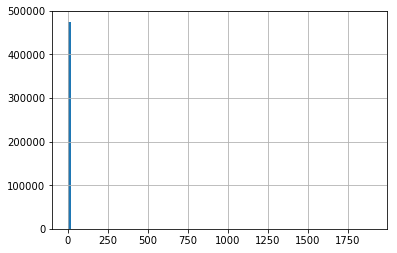

In [53]:
pd.Series(common_users.values()).hist(bins=100)

In [54]:
def pearson_sim(course1_reviews, course2_reviews, n_common):
    
    if n_common==0:
        rho=0.
    else:
        diff1=course1_reviews['rating']-course1_reviews['user_rating_avg']
        diff2=course2_reviews['rating']-course2_reviews['user_rating_avg']
        rho=pearsonr(diff1, diff2)[0]
    return rho

In [65]:
def get_course_reviews(courseid, df, set_of_users):
    
    mask = (df.userid.isin(set_of_users)) & (df.course_id==courseid)
    reviews = df[mask]
    reviews = reviews[reviews.userid.duplicated()==False]
    return reviews

In [66]:
def calculate_similarity(course1,course2,df,similarity_func):     #calculates similarity between 2 courses using some similarity function
    
    reviewers_course1=df[df.course_id==course1].userid   #gets all the user ids from df for course1
    reviewers_course2=df[df.course_id==course2].userid   #gets all the user ids from df for course2
    
    #computes the intersection (common reviewers) by comparing reviewers for course1 and course2
    reviewers_common=set(reviewers_course1).intersection(reviewers_course2) 
    n_common=len(reviewers_common)  #computes the number of common reviewers (length)
    
    #gets the reviews by common reviewers found above for course1 and course2
    reviews_course1=get_course_reviews(course1, df, reviewers_common) 
    reviews_course2=get_course_reviews(course2, df, reviewers_common) 
    
    similarity=similarity_func(reviews_course1,reviews_course2,n_common)  #using similarity functino defined above to compute similarity
    
    #checks to see if similarity is NaN and if true, sets similarity to zero
    if np.isnan(similarity): 
        similarity=0
        
    return (similarity,n_common)

In [67]:
similarities_dic = {}
for i in common_users.keys():
    course1 = i[0]
    course2 = i[1]
    similarity, n_common = calculate_similarity(course1, course2, df, pearson_sim)
    similarities_dic[i] = (similarity, n_common)

/home/anusha/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/anusha/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3031: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


In [76]:
similarities_dic[(289230, 851712)]

(-0.56373539070999334, 22)

In [77]:
np.save('similarities_corr.npy', similarities_dic)

In [78]:
np.save("common_users.npy", common_users)

In [79]:
np.save("commonUses.npy", commonUsers)

In [315]:
def pearson_sim(course1_reviews, course2_reviews, common):

    if common==0:
        rho=0.
    else:
        diff1=course1_reviews['rating']-course1_reviews['user_rating_avg']
        diff2=course2_reviews['rating']-course2_reviews['user_rating_avg']
        rho=pearsonr(diff1, diff2)[0]
        if np.isnan(rho):
            rho=0.
    return rho

In [316]:
def get_course_reviews(courseid, df, set_of_users):
    """
    given a course id and a set of reviewers, return the sub-dataframe of their
    reviews.
    """
    mask = (df.user_id.isin(set_of_users)) & (df.course_id==courseid)
    reviews = df[mask]
    reviews = reviews[reviews.userid.duplicated()==False]
    return reviews
